In [1]:
import pandas as pd
import numpy as np

#Load dataset
admission = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\DecisionTree\admission.csv")

**Q1) Perform Exploratory Data Analysis (EDA) tasks**

**a) Visualize the 10 random rows of the data set**

In [2]:
admission.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
420,421,299,100,3,2.0,3.0,7.42,0,0.42
122,123,310,106,4,1.5,2.5,8.36,0,0.57
465,466,305,96,4,3.0,4.5,8.26,0,0.54
119,120,327,104,5,3.0,3.5,8.84,1,0.71
456,457,299,100,2,2.0,2.0,7.88,0,0.51
362,363,338,115,5,4.5,5.0,9.23,1,0.91
93,94,301,97,2,3.0,3.0,7.88,1,0.44
59,60,311,104,2,2.0,2.0,8.30,0,0.42
482,483,328,113,4,4.0,2.5,8.77,1,0.83
103,104,317,104,2,4.5,4.0,8.47,0,0.57


In [3]:
admission.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

**b) Generate the description for numeric variables**

In [4]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**c) Check the shape of the data set**

In [5]:
admission.shape

(500, 9)

**d) Generate the correlation matrix**

In [6]:
corr = admission.corr()
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


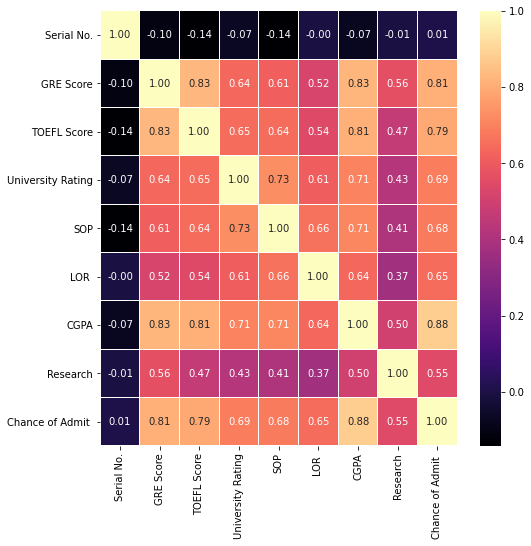

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, linewidths=0.05, fmt='.2f', cmap='magma')
plt.show()

The attribute 'Serial no' does not contribute significantly towards the analysis so we can drop this column

In [8]:
#Dropping 'Serial no' attribute
admission.drop('Serial No.', axis=1, inplace=True)

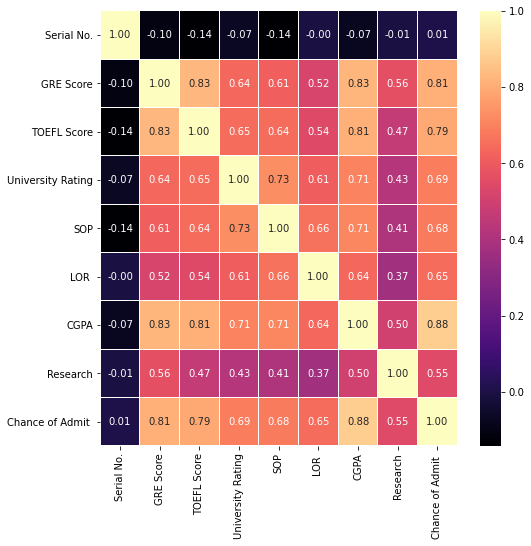

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, linewidths=0.05, fmt='.2f', cmap='magma')
plt.show()

**e) Generate a correlogram**

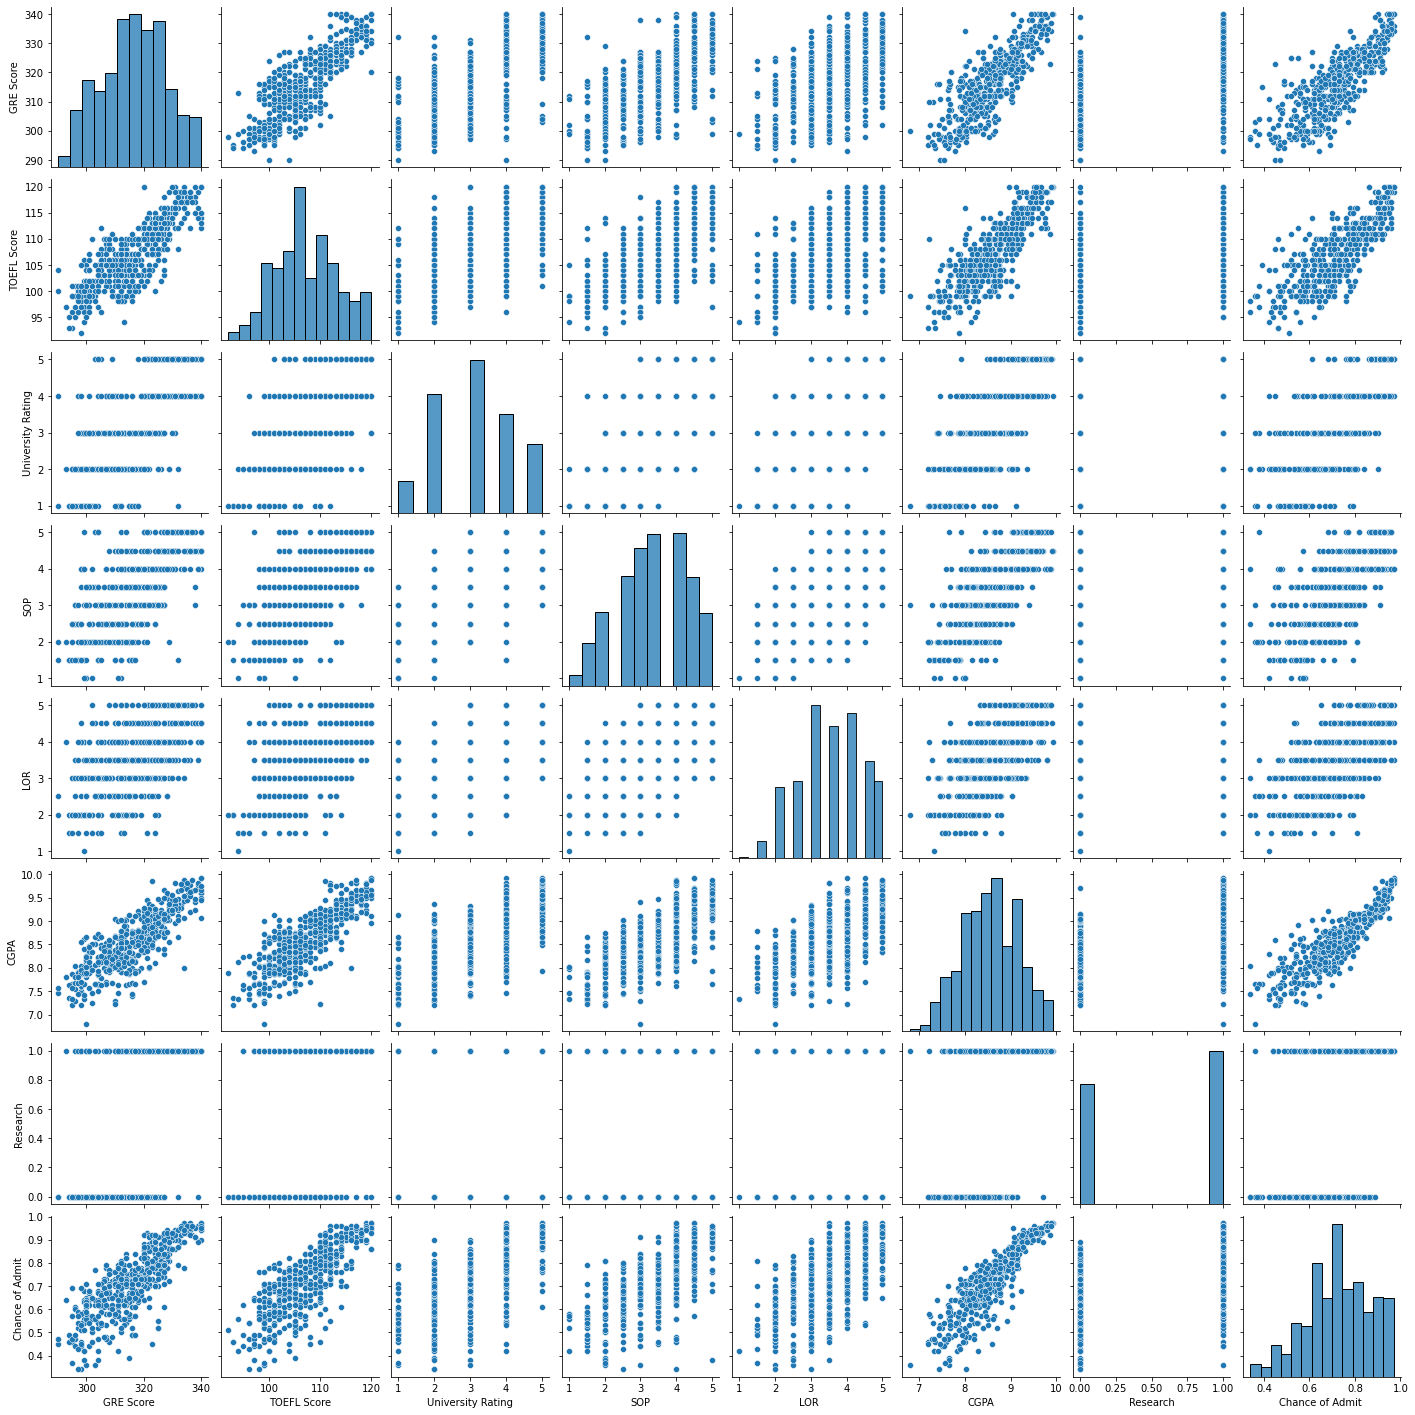

In [10]:
sns.pairplot(admission, palette="Set2")
plt.show()

**Q2) Find out the minimum and maximum values for GRE score**

In [11]:
print("Minimum GRE Score: ", admission["GRE Score"].min())
print("Maximum GRE Score: ", admission["GRE Score"].max())

Minimum GRE Score:  290
Maximum GRE Score:  340


In [12]:
print("Minimum TOEFL Score: ", admission["TOEFL Score"].min())
print("Maximum TOEFL Score: ", admission["TOEFL Score"].max())

Minimum TOEFL Score:  92
Maximum TOEFL Score:  120


**Q3) Find out the percentage of universities for each university rating**

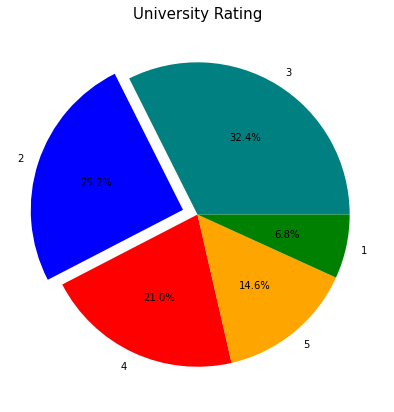

In [13]:
colors = ['teal', 'blue', 'red', 'orange', 'green']
explode = [0, 0.1, 0, 0, 0]
plt.figure(figsize=(7, 7))
plt.pie(admission["University Rating"].value_counts().values, explode=explode, labels=admission["University Rating"].value_counts().index, colors=colors, autopct='%1.1f%%')
plt.title("University Rating", fontsize=15)
plt.show()

In [14]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [15]:
data = admission.copy()
data["University Rating"] = data["University Rating"].astype("object")

data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating     object
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

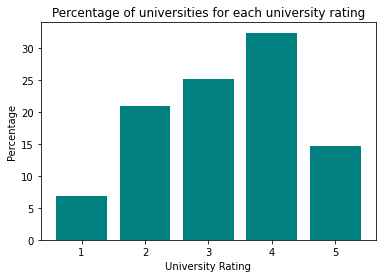

In [16]:
percentage = (data["University Rating"].value_counts() / len(data)) * 100
rating = data["University Rating"].unique()
plt.bar(rating, percentage, color="teal")

plt.xlabel("University Rating")
plt.ylabel("Percentage")
plt.title("Percentage of universities for each university rating")
plt.show()

**Q4) Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :**

**Students having the “Chance of Admit” value > 0.80, are assigned value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned value 0
Where 0: Low chance of Admission and 1: High chance of admission**

In [17]:
#Converting the target variable to categorical having 0 & 1
data.loc[data["Chance of Admit "] > 0.80, "Chance of Admit "] = 1
data.loc[data["Chance of Admit "] <= 0.80, "Chance of Admit "] = 0

data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,0.0
4,314,103,2,2.0,3.0,8.21,0,0.0
5,330,115,5,4.5,3.0,9.34,1,1.0
6,321,109,3,3.0,4.0,8.20,1,0.0
7,308,101,2,3.0,4.0,7.90,0,0.0
8,302,102,1,2.0,1.5,8.00,0,0.0
9,323,108,3,3.5,3.0,8.60,0,0.0


In [18]:
from sklearn.model_selection import train_test_split

#Set of independent variables
X = data.iloc[:, :-1]

#Target variable
y = data.iloc[:, -1]

#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

**Q5) Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.**

In [19]:
#Model building
from sklearn.tree import DecisionTreeClassifier

#Creating a decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

In [20]:
#Training the model
clf_fit = clf_entropy.fit(X_train, y_train)

#Predicting the chance of admission
y_pred = clf_fit.predict(X_test)

In [21]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.91

In [22]:
#Hyperparameter tuning
#Again creating Decision Tree classifier
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=200, max_depth=4, min_samples_leaf=10)

In [23]:
#Training the model
clf_fit2 = clf_gini.fit(X_train, y_train)

#Predicting the chance of admission
y_pred2 = clf_fit2.predict(X_test)

In [24]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.94

We can see here that by changing the values of the parameter, there is a slight increase in the accuracy. Earlier we were using 'Entropy' as criterion, now we are using 'Gini' as criterion, the max depth of the tree has been increased and so on. Similarly, we can keep on tuning the parameters, to obtain the highest accuracy.